In [163]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from scipy.stats.stats import pearsonr
from sklearn.tree import export_graphviz
from IPython.display import Image

Okay so we have imported the necessary libraries and now we move forward! <i>Do Remember: <b> That you may not know all the libraries before hand and this list will (most probably) grow as you tackle any problem</b></i>

Let us now journey on this little path to configure the settings of Seaborn to make our graphs a little prettier. You will see a different in any of the graphs which you do use!

In [49]:
sns.set(style='whitegrid', palette='muted')

We import our BlackFriday.csv file using Pandas built-in method: <b>read_csv()</b>

In [99]:
blafri_dataframe=pd.read_csv('BlackFriday.csv')

Let us have a look at our data so far

In [100]:
blafri_dataframe

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


We can now use another Pandas built in method to view basic statistics about our data, remember that pandas usually, by default, ignores NaN values(and string?). This built-in method is: <b>describe()</b>

In [101]:
blafri_dataframe.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


<b style="color:gray;">Before we continue, I would like to motivate the use of Bar Charts over Pie Charts. Even though both are great representations of categorical variables, Bar Charts are known to be preferred over Pie charts</b>

Okay so let us have a little fun analyzing the data which we have! Let us see the amount of transactions that is grouped by Gender

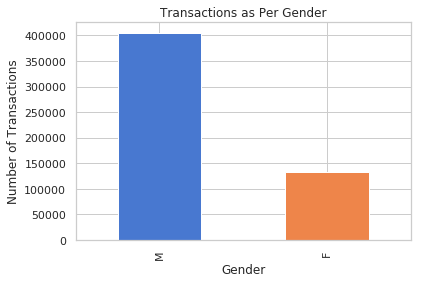

In [103]:
a=blafri_dataframe.Gender.value_counts()#Here is where we use the pandas built in method (value_counts()) on the Gender column to get the number of items per gender
a.plot(kind='bar')#Here is where we create a bar plot on the Series Dataframe
plt.title('Transactions as Per Gender')#We set the title of the plot
plt.xlabel('Gender')#Here we set the label for the x-axis
plt.ylabel('Number of Transactions')#We use this to set the label for the y-axis
plt.show()#Here we show the plot

Oh my! We seem to have much more males as compared to females. This can lead to a bias when making predictions since we do have majority of males making transactions

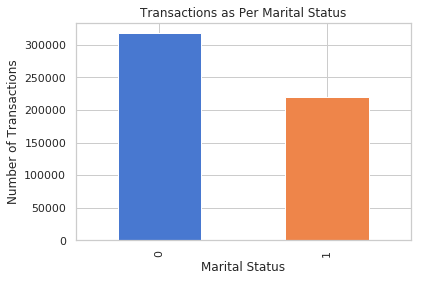

In [104]:
b=blafri_dataframe.Marital_Status.value_counts()
b.plot(kind='bar')
plt.title('Transactions as Per Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Transactions')
plt.show()

So now we have a look at the marital status. We have a better balance of married and single customers as compared to male and female customers. So let us continue

In [105]:
test=blafri_dataframe.groupby('Age').count()
test

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,,,,,,
0-17,14707,14707,14707,14707,14707,14707,14707,14707,10466,4789,14707
18-25,97634,97634,97634,97634,97634,97634,97634,97634,68256,30889,97634
26-35,214690,214690,214690,214690,214690,214690,214690,214690,147745,65916,214690
36-45,107499,107499,107499,107499,107499,107499,107499,107499,74169,32758,107499
46-50,44526,44526,44526,44526,44526,44526,44526,44526,30441,13135,44526
51-55,37618,37618,37618,37618,37618,37618,37618,37618,25652,11018,37618
55+,20903,20903,20903,20903,20903,20903,20903,20903,13862,5773,20903


In [106]:
age_groups=['0-17', '18-25', '26-35','36-45', '46-50','51-55', '55+']
values=[]
for x in age_groups:
    values.append((blafri_dataframe.Age == x).sum())

In [107]:
values

[14707, 97634, 214690, 107499, 44526, 37618, 20903]

So we took our age groups and found all the corresponding value counts... Let us use pandas built in method value_counts (which counts the occurences of all unique values), and ensure that we are right

In [108]:
blafri_dataframe.Age.value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

This seems just about right. Let us make plot this neatly.. Learned using https://stackoverflow.com/questions/34029865/how-to-plot-bar-chart-for-a-list-in-python

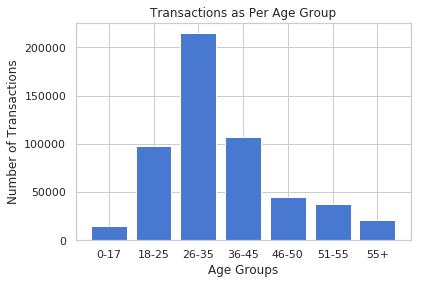

In [109]:
xs=np.arange(len(age_groups))
plt.bar(xs, values,align='center')
plt.xticks(xs, age_groups)#We replace the default x-axis labels with the ones that we actually want(age_groups)
plt.title('Transactions as Per Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Number of Transactions')
plt.show()

We do the long process above to avoid ordering the chart by the bar height but rather by the labels on the x-axis. You can try and see for yourself, that when you just plot the Age column on a bar plot, the labels on the x-axis is not well ordered and can lead to a bit of confusion and embarassment! <b>Remember that we cannot always expect expernal libraries to do all of the work for us. Sometimes, we must work with them!</b>

<b>There seems to be many rows that are NaN and if we drop these rows then we lose more than 50% of our data... Another good technique to handle missing values is to replace the values with the mean of the column... Let us give it a try... Since all values are seem to be values with no decimal places, I will round off the mean</b>

In [110]:
blafri_dataframe.Product_Category_2.replace(np.nan, 10.0, inplace=True)
blafri_dataframe.Product_Category_3.replace(np.nan, 13.0, inplace=True)

In [111]:
blafri_dataframe

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,10.0,13.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,10.0,13.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,13.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,10.0,13.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,13.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,13.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,13.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,10.0,13.0,7871


We have a look at the statistics on the dataframe once more to ensure that not much variation has occured

In [112]:
blafri_dataframe.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.891178,12.899107,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4.224504,2.285005,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,8.000000,13.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,10.000000,13.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,13.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


Now I just wanted to have a look at the unique values of certain columns. We can use the python built-in method, <b>set()</b>, to find unique values in a list of values

In [113]:
unique_occupation=set(blafri_dataframe.Occupation.values)
unique_product1=set(blafri_dataframe.Product_Category_1.values)
unique_product2=set(blafri_dataframe.Product_Category_2.values)
unique_product3=set(blafri_dataframe.Product_Category_3.values)

In [114]:
print(unique_occupation)
print(unique_product1)
print(unique_product2)
print(unique_product3)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0}
{3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0}


Now let us have a look at what kind of data we may be dealing with

In [115]:
blafri_dataframe.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Now let us consider this... The product categories are quite similar however they are floats and ints... Let us keep them consistent and convert all to integers since we see that there are no decimal values

In [116]:
blafri_dataframe.Product_Category_2=blafri_dataframe.Product_Category_2.astype(int)
blafri_dataframe.Product_Category_3=blafri_dataframe.Product_Category_3.astype(int)

In [117]:
blafri_dataframe.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

Now it does seem odd to have age and gender as objects(Strings). Let us try to change them, but first let us have a look with what we are working with

In [118]:
unique_age=set(blafri_dataframe.Age.values)
unique_gender=set(blafri_dataframe.Gender.values)

In [119]:
print(unique_age)
print(unique_gender)

{'46-50', '0-17', '55+', '26-35', '36-45', '18-25', '51-55'}
{'M', 'F'}


So since it is much better for models to understand and learn with numeric data, let us convert these categorical variables to numeric category variables using sklearn's <b>LabelEncoder()</b>

In [120]:
label_encoder=LabelEncoder()
label_encoder.fit(blafri_dataframe.Age)
blafri_dataframe.Age=label_encoder.transform(blafri_dataframe.Age)

In [121]:
label_encoder_gender=LabelEncoder()
label_encoder_gender.fit(blafri_dataframe.Gender)
blafri_dataframe.Gender=label_encoder_gender.transform(blafri_dataframe.Gender)

In [132]:
label_encoder_city=LabelEncoder()
label_encoder_city.fit(blafri_dataframe.City_Category)
blafri_dataframe.City_Category=label_encoder_city.transform(blafri_dataframe.City_Category)

In [133]:
label_encoder_city_stay=LabelEncoder()
label_encoder_city_stay.fit(blafri_dataframe.Stay_In_Current_City_Years)
blafri_dataframe.Stay_In_Current_City_Years=label_encoder_city_stay.transform(blafri_dataframe.Stay_In_Current_City_Years)

So after using SKLearns Label encoder we then updated the columns in the dataframe to numeric categorical values

In [134]:
blafri_dataframe.dtypes

User_ID                        int64
Product_ID                    object
Gender                         int64
Age                            int64
Occupation                     int64
City_Category                  int64
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

In [135]:
blafri_dataframe.describe()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.000000,537577.000000,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,0.754087,2.494755,8.08271,1.040567,1.859458,0.408797,5.295546,9.891178,12.899107,9333.859853
std,1.714393e+03,0.430627,1.352583,6.52412,0.759627,1.289828,0.491612,3.750701,4.224504,2.285005,4981.022133
min,1.000001e+06,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,1.000000,2.000000,2.00000,0.000000,1.000000,0.000000,1.000000,8.000000,13.000000,5866.000000
50%,1.003031e+06,1.000000,2.000000,7.00000,1.000000,2.000000,0.000000,5.000000,10.000000,13.000000,8062.000000
75%,1.004417e+06,1.000000,3.000000,14.00000,2.000000,3.000000,1.000000,8.000000,14.000000,13.000000,12073.000000
max,1.006040e+06,1.000000,6.000000,20.00000,2.000000,4.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [171]:
agecorr_value=pearsonr(blafri_dataframe.Age, blafri_dataframe.Purchase)
agecorr_value# This displayed the (correlation coefficient,p-value)

(0.01771663037462214, 1.3805049656995085e-38)

We can see an <b>almost neutral relationship(slightly positive)</b> between Age and Purchase, <b>since the value is close to 0</b>

In [178]:
gendercorr_value=pearsonr(blafri_dataframe.Gender, blafri_dataframe.Purchase)
gendercorr_value

(0.06008616598694717, 0.0)

We can see an <b>almost neutral relationship(slightly positive)</b> between Gender and Purchase, <b>since the value is close to 0</b>

In [179]:
maritcorr_value=pearsonr(blafri_dataframe.Marital_Status, blafri_dataframe.Purchase)
maritcorr_value

(0.00012901814909539643, 0.9246361830127376)

In [180]:
occupcorr_value=pearsonr(blafri_dataframe.Occupation, blafri_dataframe.Purchase)
occupcorr_value

(0.02110434019412733, 5.092402323308689e-54)

Okay so how the heck do I choose the features for this dataset. Let us think about each feature(column):
<table border="1">
<tr>
    <td>
        User ID
    </td>
    <td>
    So this seems to be a unique identifier for a specific user and since we don't really need to concern ourselves with the identity of the person who made the purchase then we can leave this out!
    </td>
</tr>


<tr>
    <td>
        Product ID
    </td>
    <td>
     This is similar to the previous reason. We are not really concerned with the specific information of the product, then we can leave this out
    </td>
</tr>

<tr>
    <td>
        Gender
    </td>
    <td>
        Since it does seem that the gender of the individual may effect the purchase price. We shall use these and test the model accuracy after
    </td>
</tr>

<tr>
    <td>
        Age
    </td>
    <td>
        The age of the individual may impact the purchase price. We shall use these and test the model accuracy after
    </td>
</tr>

<tr>
    <td>
        Occupation
    </td>
     <td>
        The job category may influence their purchase price
    </td>
</tr>

<tr>
    <td>
        City_Category
    </td>
    <td>
        I am unsure of whether the category of the city may influence the purchase price so to reduce the input dimensions, I will initially decide to leave this out
    </td>
</tr>

<tr>
    <td>
        Stay_In_Current_City_Years
    </td>
    <td>
        Hmmm the amount of years that a person has stayed in a city is a bit difficult to assume that it directly effects the purchase price and this may be entirely biased but I will initially leave this out as well
    </td>
</tr>

<tr>
    <td>
        Marital_Status
    </td>
    <td>
        It does seem that the maritial status may affect the price since more than one person may be contributing to the purchase
    </td>
</tr>

<tr>
    <td>
        Product_Category_1, Product_Category_2, Product_Category_3
    </td>
    <td>
        Okay so the type of product may directly influence the purchase price since it may seem as though that the product category have different prices
    </td>
</tr>

<tr>
    <td>
        Purchase
    </td>
    <td>
        These will be the labels since we will be predicting these variables
    </td>
</tr>

</table>

We now assign the appropriate columns to our features(input) and labels(output)

In [181]:
feature_names=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
label_names=['Purchase']

In [157]:
features=np.array(blafri_dataframe[feature_names])
labels=np.array(blafri_dataframe[label_names])

In [182]:
features[0]

array([ 0,  0, 10,  0,  2,  0,  3, 10, 13])

We can evidently see that our features are on different scales, some range from 0-1 and others from 0-20. It is good practice to normalize our features and put them on similar scaled, we can use sklearn's <b>Normalizer()</b> to normalize the features and put them all on the same scale

In [183]:
scaler=Normalizer(copy=True, norm='l2')
features_scaled=scaler.fit_transform(features)

In [184]:
features_scaled[0]

array([0.        , 0.        , 0.51164451, 0.        , 0.1023289 ,
       0.        , 0.15349335, 0.51164451, 0.66513786])

We now use sklearn's train_test_split to split our features(scaled) and labels into a training and testing set

In [144]:
x_train, x_test, y_train, y_test= train_test_split(features_scaled, labels, test_size=0.33)

In [145]:
x_train.shape

(360176, 9)

We first try using our data on sklearn's LinearRegression algorithm. We can see that this does not return a very good accuracy. 

In [146]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
print(reg.score(x_test, y_test))

0.1656742132737279


I wanted to try BayesianRidge regression and it seems to return around the same accuracy as LinearRegression. Interesting!

In [148]:
clf= BayesianRidge(compute_score=True)
clf.fit(x_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [149]:
print(clf.score(x_test, y_test))

0.16567414035449823


<p>So now we try using RandomForests regression which is an emsemble model that count be found on the scikit learn API(See import in first block). RandomForests uses multiple decision trees to make decisions, by averaging out the predictions from the different decision trees. By using multiple decision trees (Forests) we tend to find an improved accuracy and better control over over-fitting. So why use multiple decision trees? Well Francois Chollet helped me understand that the different models, or trees in this example, learn different representations of the same dataset. This can allow models to help one another to <b>fill in any gaps.</b> </p>

In [150]:
regr=RandomForestRegressor(max_depth=None, random_state=0, n_estimators=100)

In [151]:
regr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [152]:
regr.score(x_train,y_train)

0.7906741318512153

In [153]:
regr.score(x_test,y_test)

0.6202955027139159

As you can see, sklearn's RandomForestRegressor significantly improves accuracy on multivariate (means multiple input features) regression problems. I do hope that this may help any curious person achieve better accuracy and learn much more about how to approach regression problems

<h1>So these are the various approaches that I had used</h1>

<ul>
    <li>Updated the NaN values to the mean of the column. If we drop the NaN values, we lose way more than 50% of our data</li>
    <li>
    Attempted average out the 3 product categories. This resulted in a drop in accuracy score
    </li>
    <li>So also tried multiple regression models and the one that currently has the best performance is RandomForestRegressor, which uses boosting to increase models capabilities of learning different representations and therefore making better predictions by averaging out the multiple predictions</li>
    <li>
        Initially, I decided to leave out City_Category and Stay_In_Current_City_Years but adding them to the RandomForestRegressor has improved the training accuracy and left the test accuracy with almost no change
    </li>


</ul>